# Visualization of Covid19
### by Karan Sharma - Feb 2021

Machine learning has numerous tools that can be used for visualization and prediction, and nowadays it is used worldwide for study of the pattern of COVID-19 spread. One of the main focus of the study in this project is to use machine learning techniques to analyze and visualize the spreading of the virus country-wise as well as globally during a specific period of time by considering confirmed cases, recovered cases and fatalities. This Notebook Covers the Visualization of Covid19 Data. There will gonna an other Notebook as well for Prediction Part of this Project. 

**Data Sources** : __[COVID-19 datasets from Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)__

**More information** :  __[World Health Organisation(WHO)](https://www.who.int/emergencies/diseases/novel-coronavirus-2019)__

**Last Datesets Update**: 08-02-2021

### Current date and time

In [1]:
from datetime import datetime

print(datetime.now())

2021-02-07 17:25:29.673734


## Some installations

In [2]:
# %pip install statsmodels

# %pip install pystan

# %pip install fbprophet

In [3]:
# %pip install nodejs

# %pip install jupyterlab "ipywidgets>=7.5"

# %pip install npm

# JupyterLab renderer support
# !jupyter labextension install jupyterlab-plotly@4.8.2
# %pip install pycountry

# Import some libraries

In [4]:
# for dataset handling and calculations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
%matplotlib inline

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline plotting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime, timedelta

# for file and folder operations
import os

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

# Read datasets

In [5]:
# read files from url
download_root = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_df = pd.read_csv(download_root + "time_series_covid19_confirmed_global.csv")
recovered_df = pd.read_csv(download_root + "time_series_covid19_recovered_global.csv")
deaths_df = pd.read_csv(download_root + "time_series_covid19_deaths_global.csv")

# save datasets as '*.csv' file
confirmed_df.to_csv('confirmed_df.csv', index = False)
recovered_df.to_csv('recovered_df.csv', index = False)
deaths_df.to_csv('deaths_df.csv', index = False)

In [6]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062


In [7]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2397,2399,2400,2400,2404,2405,2406,2407,2407,2408
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1350,1358,1369,1380,1393,1398,1404,1418,1433,1446
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2881,2884,2888,2891,2894,2898,2900,2904,2909,2909
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,100,100,101,101,101,102,103,103,104,105
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,464,464,464,466,466,468,470,473,474,475


In [48]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,47583,47606,47609,47679,47723,47798,47982,47995,48018,48027
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,45906,46420,46927,47424,47922,48377,48958,49543,50219,50875
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,72745,72956,73152,73344,73530,73732,73940,74136,74330,74330
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8942,8986,9045,9093,9206,9252,9313,9395,9444,9492
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17692,17918,18015,18035,18180,18232,18335,18381,18431,18475


# Make a full dataframe by merging all of three

In [9]:
# melt dataframes to go from wide to long
def melt_df(df, name):
    melted = pd.melt(df, id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                    value_vars = confirmed_df.columns[4:],
                    var_name = 'Date', value_name = name)
    return melted

melt_confirmed = melt_df(confirmed_df, 'Confirmed')
melt_recovered = melt_df(recovered_df, 'Recovered')
melt_deaths = melt_df(deaths_df, 'Deaths')

print(melt_confirmed.head())

# merge dataframes
def merge(df1, df2):
    merged = pd.merge(left = df1, right = df2, how = 'left',
                     on = ['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'])
    return merged

main_df = merge(merge(melt_confirmed, melt_deaths), melt_recovered)
print(main_df.shape)
main_df.head()

  Province/State Country/Region       Lat       Long     Date  Confirmed
0            NaN    Afghanistan  33.93911  67.709953  1/22/20          0
1            NaN        Albania  41.15330  20.168300  1/22/20          0
2            NaN        Algeria  28.03390   1.659600  1/22/20          0
3            NaN        Andorra  42.50630   1.521800  1/22/20          0
4            NaN         Angola -11.20270  17.873900  1/22/20          0
(104286, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [10]:
main_df.to_csv('covid19_full_uncleaned.csv', index = False)

# Preparation of the dataset

In [11]:
# Percentage of the missing data in each column

number_of_rows = main_df.shape[0]
percentage_of_missing_data = main_df.isnull().sum() / number_of_rows
percentage_of_missing_data

Province/State    0.692308
Country/Region    0.000000
Lat               0.003663
Long              0.003663
Date              0.000000
Confirmed         0.000000
Deaths            0.000000
Recovered         0.076923
dtype: float64

In [12]:
# fill missing values of 'Recovered' with 0
main_df['Recovered'] = main_df['Recovered'].fillna(0)

# fill missing values of 'Province/State' with ''
main_df['Province/State'] = main_df['Province/State'].fillna('')

# fill missing values of 'Lat' with median 
median = main_df['Lat'].median()
main_df['Lat'] = main_df['Lat'].fillna(median)

# fill missing values of 'Long' with median 
median = main_df['Long'].median()
main_df['Long'] = main_df['Long'].fillna(median)

# Change the values of 'Recovered' to int datatype
main_df['Recovered'] = main_df['Recovered'].astype('int')

# change names of some countries
main_df['Country/Region'] = main_df['Country/Region'].replace('Korea, South', 'South Korea')
main_df['Country/Region'] = main_df['Country/Region'].replace('Mainland China', 'China')
main_df['Country/Region'] = main_df['Country/Region'].replace('Taiwan*', 'Taiwan')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Kinshasa)', 'Democratic Republic of the Congo')
main_df['Country/Region'] = main_df['Country/Region'].replace('Congo (Brazzaville)', 'Republic of the Congo')
main_df.loc[main_df['Province/State'] == 'Greenland', 'Country/Region'] = 'Greenland'

# define new feature for main df
main_df['Active'] = main_df['Confirmed'] - main_df['Deaths'] - main_df['Recovered']

main_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
104281,,Vietnam,14.058324,108.277199,2/6/21,1985,35,1468,482
104282,,West Bank and Gaza,31.952200,35.233200,2/6/21,162029,1870,152120,8039
104283,,Yemen,15.552727,48.516388,2/6/21,2127,615,1428,84
104284,,Zambia,-13.133897,27.849332,2/6/21,61427,839,53410,7178
104285,,Zimbabwe,-19.015438,29.154857,2/6/21,34487,1316,28383,4788


In [13]:
main_df['Date'].describe()

count     104286
unique       382
top       2/5/21
freq         273
Name: Date, dtype: object

In [14]:
# convert dates to proper date format for better visualization
# dt.normalize() is just to change display from 2020-04-09 00:00:00 to 2020-04-09

main_df['Date'] = pd.to_datetime(main_df['Date']).dt.normalize()
main_df['Date'].describe()

count                  104286
unique                    382
top       2020-10-28 00:00:00
freq                      273
first     2020-01-22 00:00:00
last      2021-02-06 00:00:00
Name: Date, dtype: object

In [15]:
main_df['Date']

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
104281   2021-02-06
104282   2021-02-06
104283   2021-02-06
104284   2021-02-06
104285   2021-02-06
Name: Date, Length: 104286, dtype: datetime64[ns]

 ### Web scraping to get <a href= 'https://www.who.int/countries/' target = '_blank'> **WHO regions related to country names**</a>
 
* African Region (AFRO)
* Region of the Americas (PAHO)
* South-East Asia Region (SEARO)
* European Region (EURO)
* Eastern Mediterranean Region (EMRO)
* Western Pacific Region (WPRO)

In [16]:
# remove rows in which 'Country/Region' is a ship name

main_df = main_df[main_df['Country/Region'].str.contains('Diamond Princess') != True]
main_df = main_df[main_df['Country/Region'].str.contains('MS Zaandam') != True]

**Note:** download this csv file manually 

In [17]:
file_path = 'Downloads/WHO_regions.csv'
WHO_regions = pd.read_csv(file_path)
WHO_regions

,Country,Region Name
0,A,NaN
1,Afghanistan,EMRO
2,Albania,EURO
3,Algeria,AFRO
4,Andorra,EURO
...,...,...
213,Y,NaN
214,Yemen,EMRO
215,Z,NaN
216,Zambia,AFRO


### Add 'WHO region' Column

In [18]:
# WHO_regions dataframe to  dictionary
new_who = WHO_regions.copy() 
new_who = new_who.set_index('Country').T.to_dict('list')

# Add 'WHO region' Column
for k, v in new_who.items():
    main_df.loc[main_df['Country/Region'] == k, 'WHO region'] = v[0]

**Note:** below are the names of the places where WHO region values are Null

In [19]:
# fill the missing values of WHO region
who_exceptions={'Antigua and Barbuda':'PAHO', 'Brunei':'WPRO', 'Cabo Verde':'AFRO', 'Republic of the Congo':'AFRO',
 "Cote d'Ivoire":'AFRO', 'Czechia':'EURO', 'Greenland':'EURO', 'Eswatini':'AFRO', 'Holy See':'EURO', 'Iran':'EMRO',
 'South Korea':'WPRO', 'Liechtenstein':'EURO', 'Moldova':'EURO', 'North Macedonia':'EURO', 'Russia':'EURO',
 'Taiwan':'WPRO', 'Tanzania':'AFRO', 'US':'PAHO', 'Vietnam':'WPRO', 'Syria':'EMRO', 'Laos':'WPRO', 
'West Bank and Gaza':'EMRO', 'Kosovo':'EURO', 'Burma':'SEARO', 'Western Sahara':'AFRO', 'Sao Tome and Principe':'AFRO'}

for k, v in who_exceptions.items():
    main_df.loc[main_df['Country/Region'] == k, 'WHO region'] = v
    
# find missing values
print(main_df[main_df['WHO region'].isna()]['Country/Region'].unique().tolist())

['Micronesia']


In [20]:
main_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,EMRO
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,EURO
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,AFRO
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,EURO
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,AFRO


### Save main_df to csv

In [21]:
main_df.to_csv('Covid19_full_cleaned.csv', index = False)

In [22]:
covid19_date_country = main_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()\
                                    .reset_index()

# add new columns containing new confirmed, new deaths, new recovered for each day
new_col = main_df.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()\
                                    .diff().reset_index()

# rename some Columns of new_col
new_col.columns = ['Country/Region', 'Date', 'New Confirmed', 'New deaths', 'New recovered']
columns = ['New Confirmed', 'New deaths', 'New recovered']

# fix the value of first row for each country
first_rows = (new_col['Country/Region'] != new_col['Country/Region'].shift(1))
new_col.loc[first_rows, 'New Confirmed'] = 0
new_col.loc[first_rows, 'New deaths'] = 0
new_col.loc[first_rows, 'New recovered'] = 0
new_col

,Country/Region,Date,New Confirmed,New deaths,New recovered
0,Afghanistan,2020-01-22,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0.0,0.0,0.0
...,...,...,...,...,...
72957,Zimbabwe,2021-02-02,266.0,20.0,211.0
72958,Zimbabwe,2021-02-03,150.0,15.0,597.0
72959,Zimbabwe,2021-02-04,207.0,19.0,368.0
72960,Zimbabwe,2021-02-05,160.0,15.0,386.0


In [23]:
covid19_date_country.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [24]:
# merging new values
covid19_date_country = pd.merge(covid19_date_country, new_col, on=['Country/Region', 'Date'])

In [25]:
covid19_date_country

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0,0,0.0,0.0,0.0
1,2020-01-22,Albania,0,0,0,0,0.0,0.0,0.0
2,2020-01-22,Algeria,0,0,0,0,0.0,0.0,0.0
3,2020-01-22,Andorra,0,0,0,0,0.0,0.0,0.0
4,2020-01-22,Angola,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
72957,2021-02-06,Vietnam,1985,35,1468,482,9.0,0.0,3.0
72958,2021-02-06,West Bank and Gaza,162029,1870,152120,8039,470.0,3.0,430.0
72959,2021-02-06,Yemen,2127,615,1428,84,3.0,0.0,1.0
72960,2021-02-06,Zambia,61427,839,53410,7178,1000.0,11.0,1365.0


In [26]:
# fill missing values with 0
covid19_date_country = covid19_date_country.fillna(0)

covid19_date_country['New Confirmed'] = covid19_date_country['New Confirmed'].apply(lambda x: 0 if x < 0 else x)

# fix data types of new columns
covid19_date_country[columns] = covid19_date_country[columns].astype('int')

# add 'WHO region'column
for k, v in new_who.items():
    covid19_date_country.loc[covid19_date_country['Country/Region'] == k, 'WHO region'] = v[0]

for k, v in who_exceptions.items():
    covid19_date_country.loc[covid19_date_country['Country/Region'] == k, 'WHO region'] = v
    

In [27]:
covid19_date_country.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,WHO region
72957,2021-02-06,Vietnam,1985,35,1468,482,9,0,3,WPRO
72958,2021-02-06,West Bank and Gaza,162029,1870,152120,8039,470,3,430,EMRO
72959,2021-02-06,Yemen,2127,615,1428,84,3,0,1,EMRO
72960,2021-02-06,Zambia,61427,839,53410,7178,1000,11,1365,AFRO
72961,2021-02-06,Zimbabwe,34487,1316,28383,4788,156,13,238,AFRO


In [28]:
# save as .csv file
covid19_date_country.to_csv('covid19_date_country.csv', index = False)

# save India_df.csv file
India_df = covid19_date_country[covid19_date_country['Country/Region'] == 'India']
India_df.to_csv('covid19_india.csv', index = False)

### Dataframe with the latest values of 'Country/Region'

In [29]:
# get the latest values related to each country
covid19_country_latest = covid19_date_country[covid19_date_country['Date'] == max(covid19_date_country['Date'])]\
                                                        .reset_index(drop = True).drop('Date', axis = 1)
print(covid19_country_latest.shape)
print(covid19_country_latest['Country/Region'].unique().shape)

# drop WHO Column
covid19_country_latest = covid19_country_latest.drop('WHO region', axis = 1)

# mortality and recovery rate
covid19_country_latest['Recovery rate(per 100)'] = \
                            np.round(100 * covid19_country_latest['Recovered'] / covid19_country_latest['Confirmed'], 2)
covid19_country_latest['Mortality rate(per 100)'] = \
                            np.round(100 * covid19_country_latest['Deaths'] / covid19_country_latest['Confirmed'], 2)

# add 'WHO regoin' column
for k, v in new_who.items():
    covid19_country_latest.loc[covid19_country_latest['Country/Region'] == k, 'WHO region'] = v[0]

for k, v in who_exceptions.items():
    covid19_country_latest.loc[covid19_country_latest['Country/Region'] == k, 'WHO region'] = v
    
# find missisng values if any
covid19_country_latest.isnull().sum()

(191, 9)
(191,)


Country/Region             0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
New Confirmed              0
New deaths                 0
New recovered              0
Recovery rate(per 100)     0
Mortality rate(per 100)    0
WHO region                 1
dtype: int64

In [30]:
# save as .csv file
covid19_country_latest.to_csv('covid19_country_latest.csv', index = False)

### Group Covid19_day_country DataFrame by 'Date'

In [31]:
covid19_world = covid19_date_country.groupby('Date')['Confirmed', 'Deaths', 'Recovered','Active', 'New Confirmed', 
                                                      'New deaths', 'New recovered'].sum().reset_index()

# Mortality and Recovery Rates
covid19_world['Recovery rate(per 100)'] = \
                np.round(100*covid19_world['Recovered']/covid19_world['Confirmed'],2)
covid19_world['Mortality rate(per 100)'] = \
                np.round(100*covid19_world['Deaths']/covid19_world['Confirmed'],2)

# No of Countries Having Non-zero Confirmed cases on each date
covid19_world['Number of countries'] = covid19_date_country[covid19_date_country['Confirmed']!=0].groupby('Date')\
                                       ['Country/Region'].unique().apply(len).values

# fill missing values with 0
columns = ['Recovery rate(per 100)', 'Mortality rate(per 100)']
covid19_world[columns] = covid19_world[columns].fillna(0)

covid19_world.head()

,Date,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
0,2020-01-22,557,17,30,510,0,0,0,5.39,3.05,6
1,2020-01-23,655,18,32,605,98,1,2,4.89,2.75,8
2,2020-01-24,941,26,39,876,286,8,7,4.14,2.76,9
3,2020-01-25,1433,42,42,1349,492,16,3,2.93,2.93,11
4,2020-01-26,2118,56,56,2006,685,14,14,2.64,2.64,13


In [32]:
# save as '*.csv' file
covid19_world.to_csv('covid19_world.csv', index=False)

## Visualizations

### the latest global status

In [33]:
sns.set_theme()

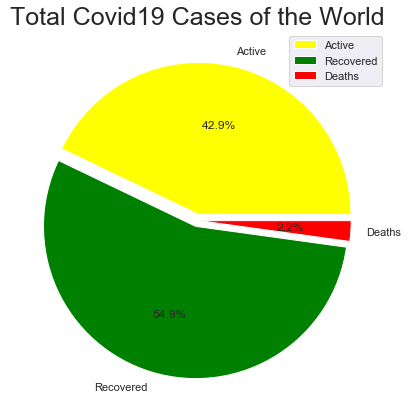

In [34]:
labels = ['Active', 'Recovered', 'Deaths']
data = covid19_world[labels].tail(1)
data[labels]
colors = ['yellow', 'green', 'Red']
explode = (0.04, 0.04, 0.01)
plt.figure(figsize  = (7, 7))
patches = plt.pie(data, colors=colors,labels = labels, explode= explode ,autopct='%1.1f%%', shadow=False, startangle=0)
ax = plt.title('Total Covid19 Cases of the World', fontsize = 25)
plt.legend()

## Current Scenario of the Covid19 in the World

In [35]:
covid19_world.tail(1)

,Date,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
381,2021-02-06,105764009,2309331,58106715,45347963,372153,10111,293045,14.33,2.18,191


In [36]:
top10_most_affected_country = covid19_country_latest.sort_values(by = 'Confirmed', ascending = False).head(10)
top10_most_affected_country

,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
177,US,26917787,462169,0,26455618,104015,2614,0,0.00,1.72,PAHO
78,India,10826363,154996,10522601,148766,12059,78,11805,97.19,1.43,SEARO
23,Brazil,9447165,230034,8428992,788139,0,0,32844,89.22,2.43,PAHO
181,United Kingdom,3941273,112305,10182,3818786,18363,828,88,0.26,2.85,EURO
140,Russia,3907653,75010,3398545,434098,16379,490,22546,86.97,1.92,EURO
60,France,3376266,78940,238899,3058427,20588,191,1144,7.08,2.34,EURO
161,Spain,2941990,61386,150376,2730228,0,0,0,5.11,2.09,EURO
84,Italy,2625098,91003,2107061,427034,13439,385,15138,80.27,3.47,EURO
176,Turkey,2524786,26685,2412505,85596,7897,108,8089,95.55,1.06,EURO
64,Germany,2285003,61551,2041988,181464,8632,227,8820,89.36,2.69,EURO


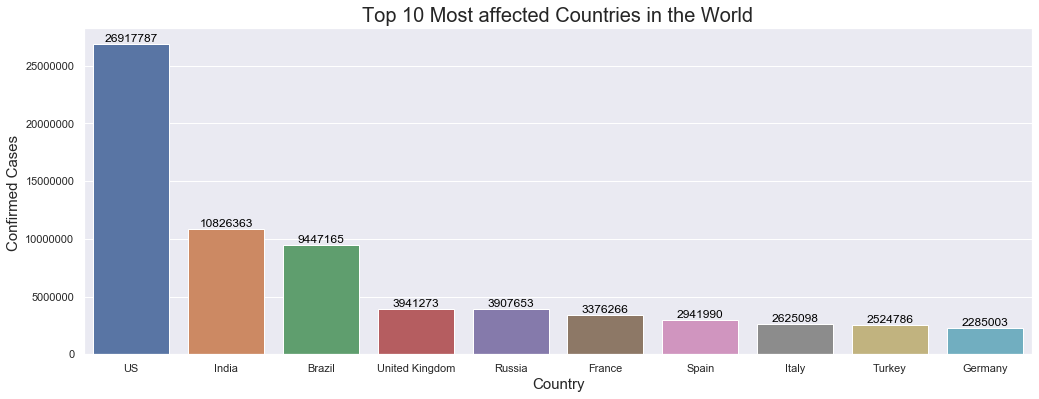

In [37]:
plt.figure(figsize = (17, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x = 'Country/Region', y = 'Confirmed', data = top10_most_affected_country)
g.set_title('Top 10 Most affected Countries in the World', fontsize = 20)
g.set_xlabel('Country', fontsize =15)
g.set_ylabel('Confirmed Cases ', fontsize = 15)

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')


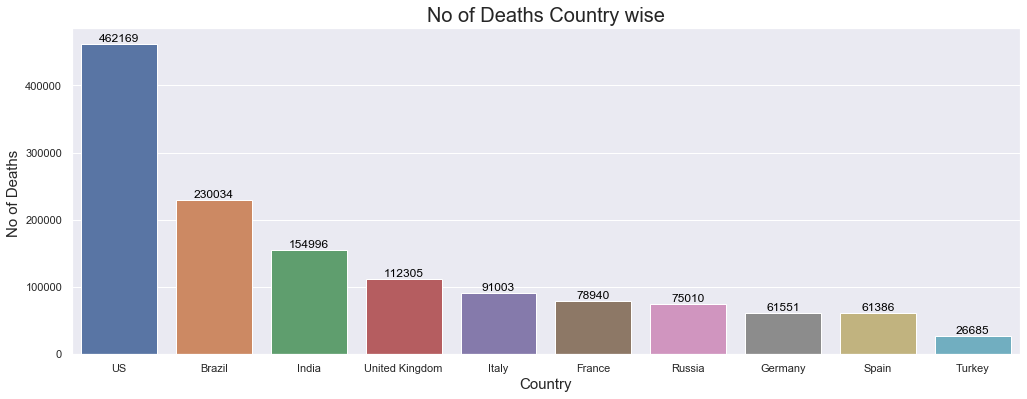

In [38]:
plt.figure(figsize = (17, 6))
plt.ticklabel_format(style='plain', axis='y')
g = sns.barplot(x = 'Country/Region', y = 'Deaths', data = top10_most_affected_country.sort_values(by = 'Deaths')[::-1])
g.set_title('No of Deaths Country wise', fontsize = 20)
g.set_xlabel('Country', fontsize =15)
g.set_ylabel('No of Deaths ', fontsize = 15)

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')


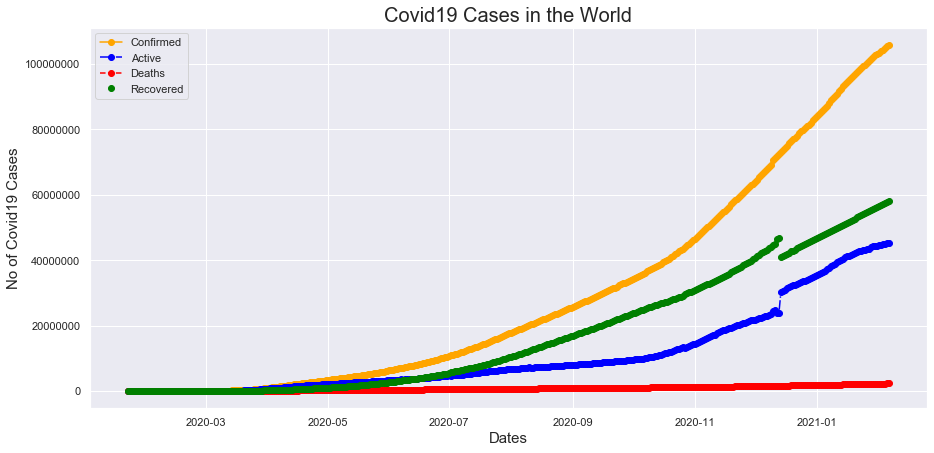

In [39]:
f = plt.figure(figsize = (15, 7))
ax = f.subplots(1, 1)

plt.ticklabel_format(style = 'plain', axis = 'y')
ax.set_title('Covid19 Cases in the World', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Covid19 Cases', fontsize = 15)

ax.plot_date(covid19_world['Date'], covid19_world["Confirmed"], color="orange", label="Confirmed", linestyle="-")
ax.plot_date(covid19_world['Date'], covid19_world["Active"], color="blue", label="Active", linestyle="-.")
ax.plot_date(covid19_world['Date'], covid19_world["Deaths"], color="red", label="Deaths", linestyle="--")
ax.plot_date(covid19_world['Date'], covid19_world["Recovered"], color="green", label="Recovered", linestyle="")
ax.legend()

In [40]:
#Current Scenario of Covid 19 Cases all over the World
covid19_world.tail(1)

,Date,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),Number of countries
381,2021-02-06,105764009,2309331,58106715,45347963,372153,10111,293045,14.33,2.18,191


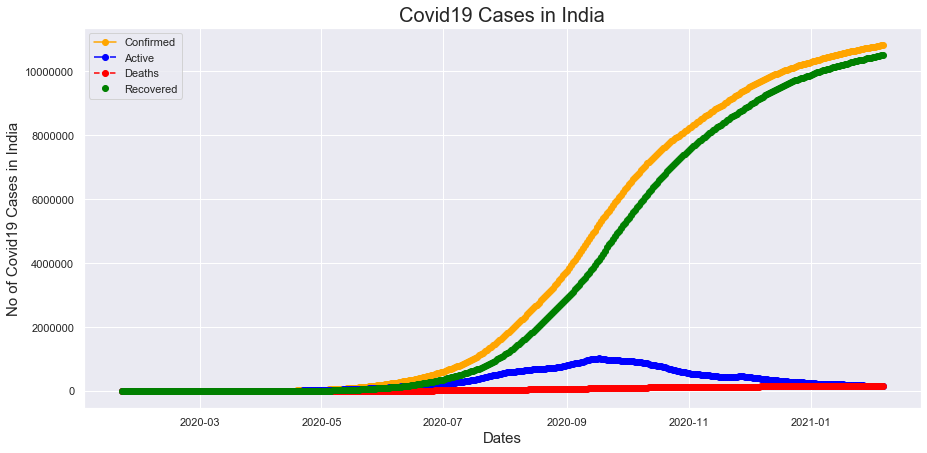

In [41]:
f = plt.figure(figsize = (15, 7))
ax = f.subplots(1, 1)

plt.ticklabel_format(style = 'plain', axis = 'y')
ax.set_title('Covid19 Cases in India', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Covid19 Cases in India', fontsize = 15)

ax.plot_date(India_df['Date'], India_df["Confirmed"], color="orange", label="Confirmed", linestyle="-")
ax.plot_date(India_df['Date'], India_df["Active"], color="blue", label="Active", linestyle="-.")
ax.plot_date(India_df['Date'], India_df["Deaths"], color="red", label="Deaths", linestyle="--")
ax.plot_date(India_df['Date'], India_df["Recovered"], color="green", label="Recovered", linestyle="")
ax.legend()

## Current Scenario of Covid19 in India

In [42]:
India_df.tail(1)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,WHO region
72849,2021-02-06,India,10826363,154996,10522601,148766,12059,78,11805,SEARO


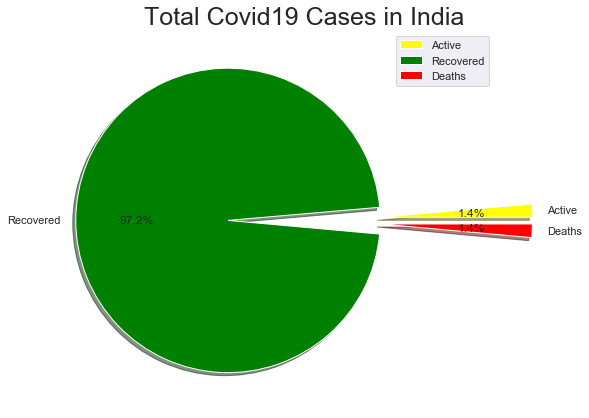

In [43]:
labels = ['Active', 'Recovered', 'Deaths']
data = India_df[labels].tail(1)
data[labels]
colors = ['yellow', 'green', 'Red']
explode = (0.5, 0.5, 0.5)
plt.figure(figsize  = (7, 7))
patches = plt.pie(data, colors=colors,labels = labels, explode= explode ,autopct='%1.1f%%', shadow=True, startangle=0)
ax = plt.title('Total Covid19 Cases in India', fontsize = 25)
plt.legend()

In [84]:
# filtering dataframe for top 10 Countries

countries = top10_most_affected_country['Country/Region'].reset_index(drop = True)
countries = np.array(countries)
top = covid19_date_country.sort_values(by = 'Confirmed', ascending = False)
top10 = top[top['Country/Region'].apply(lambda x : True if x  in countries else False)]
top10.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,WHO region
72948,2021-02-06,US,26917787,462169,0,26455618,104015,2614,0,PAHO
72757,2021-02-05,US,26813772,459555,0,26354217,133558,3674,0,PAHO
72566,2021-02-04,US,26680214,455881,0,26224333,123188,5084,0,PAHO
72375,2021-02-03,US,26557026,450797,0,26106229,121469,3912,0,PAHO
72184,2021-02-02,US,26435557,446885,0,25988672,114437,3530,0,PAHO


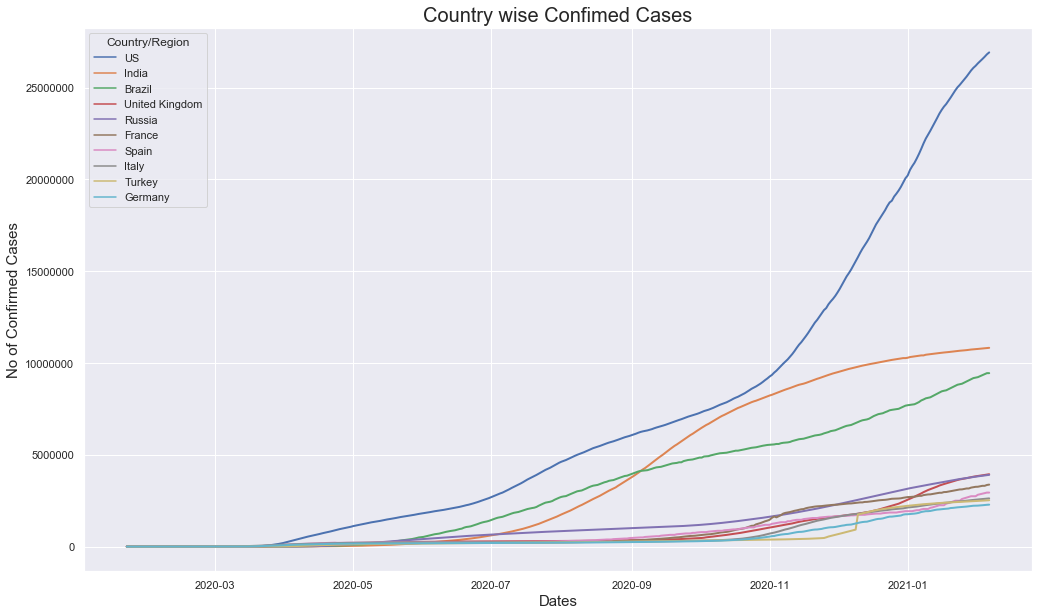

In [136]:
f = plt.figure(figsize = (17, 10))
ax = f.subplots(1, 1)
ax.set_title('Country wise Confimed Cases', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Confirmed Cases', fontsize = 15)

plt.ticklabel_format(style = 'plain', axis = 'y')
sns.lineplot(x = 'Date', y = 'Confirmed', data = top10, hue = 'Country/Region', lw = 2)

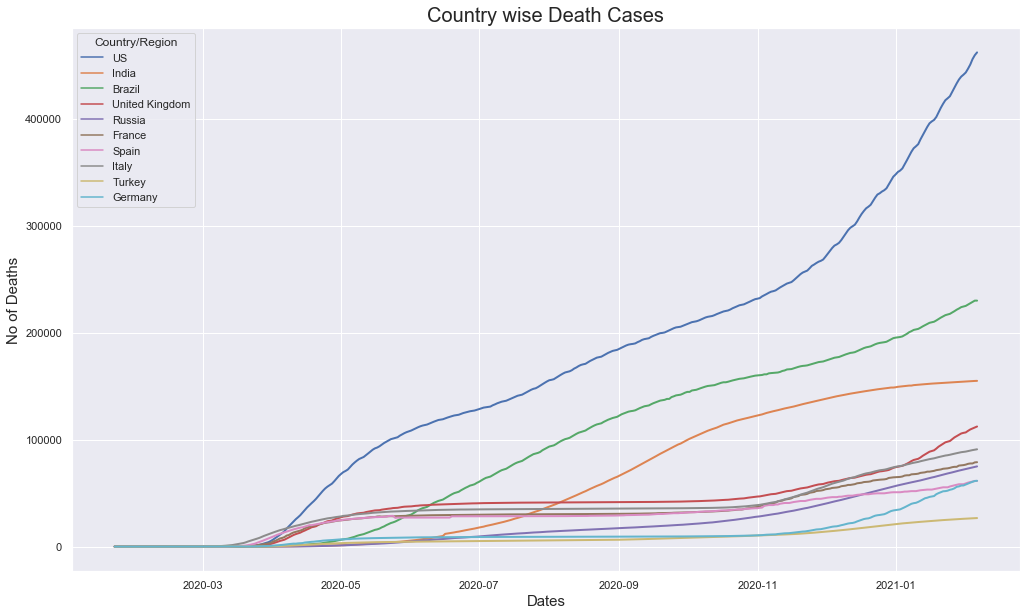

In [143]:
f = plt.figure(figsize = (17, 10))
ax = f.subplots(1, 1)
ax.set_title('Country wise Death Cases', fontsize = 20)
ax.set_xlabel('Dates', fontsize =15)
ax.set_ylabel('No of Deaths', fontsize = 15)

plt.ticklabel_format(style = 'plain', axis = 'y')
sns.lineplot(x = 'Date', y = 'Deaths', data = top10, hue = 'Country/Region', lw = 2)

# Top 10 Countries info

In [146]:
top10_most_affected_country.reset_index(drop = True, inplace = True)
top10_most_affected_country

,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New deaths,New recovered,Recovery rate(per 100),Mortality rate(per 100),WHO region
0,US,26917787,462169,0,26455618,104015,2614,0,0.00,1.72,PAHO
1,India,10826363,154996,10522601,148766,12059,78,11805,97.19,1.43,SEARO
2,Brazil,9447165,230034,8428992,788139,0,0,32844,89.22,2.43,PAHO
3,United Kingdom,3941273,112305,10182,3818786,18363,828,88,0.26,2.85,EURO
4,Russia,3907653,75010,3398545,434098,16379,490,22546,86.97,1.92,EURO
5,France,3376266,78940,238899,3058427,20588,191,1144,7.08,2.34,EURO
6,Spain,2941990,61386,150376,2730228,0,0,0,5.11,2.09,EURO
7,Italy,2625098,91003,2107061,427034,13439,385,15138,80.27,3.47,EURO
8,Turkey,2524786,26685,2412505,85596,7897,108,8089,95.55,1.06,EURO
9,Germany,2285003,61551,2041988,181464,8632,227,8820,89.36,2.69,EURO
